In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
sns.set_style('darkgrid')

In [ ]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.55 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
netflix_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_df['director']=netflix_df['director'].fillna('Unknown')
netflix_df['cast']=netflix_df['cast'].fillna('Unknown')

In [ ]:
mode=netflix_df['country'].mode()[0]

In [ ]:
netflix_df['country']=netflix_df['country'].fillna(mode)

In [ ]:
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'],format='mixed',dayfirst=False)

In [ ]:
netflix_df['year_added']=netflix_df['date_added'].dt.year
netflix_df['month_added']=netflix_df['date_added'].dt.month

In [ ]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [ ]:
netflix_df.describe()

date_added  release_year   year_added  month_added
count                           7770   7770.000000  7770.000000  7770.000000
mean   2019-01-03 10:15:28.494208512   2013.935393  2018.494981     6.784942
min              2008-01-01 00:00:00   1925.000000  2008.000000     1.000000
25%              2018-02-01 00:00:00   2013.000000  2018.000000     4.000000
50%              2019-03-08 00:00:00   2017.000000  2019.000000     7.000000
75%              2020-01-20 00:00:00   2018.000000  2020.000000    10.000000
max              2021-01-16 00:00:00   2021.000000  2021.000000    12.000000
std                              NaN      8.764357     1.387582     3.591219

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  year_added    7770 non-null   int32         
 13  month_added   7770 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 849.8+ KB


In [ ]:
netflix_df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               Unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            Unknown                                            Nasty C   
7785            Unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            Unknown   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                      United States 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  year_added  \
0     In a future where the elite inhabit an island ...        2020   
1     After a devastating earthquake hits Mexico Cit...        2016   
2     When an army recruit is f

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  
0  In a future where the elite inhabit an island ...        2020            8  
1  After a devastating earthquake hits Mexico Cit...        2016           12  
2  When an army recruit is found dead, his fellow...        2018           12  
3  In a postapocalyptic world, rag-doll robots hi...        2017           11  
4  A brilliant group of students become card-coun...        2020            1

<Figure size 1400x800 with 0 Axes>

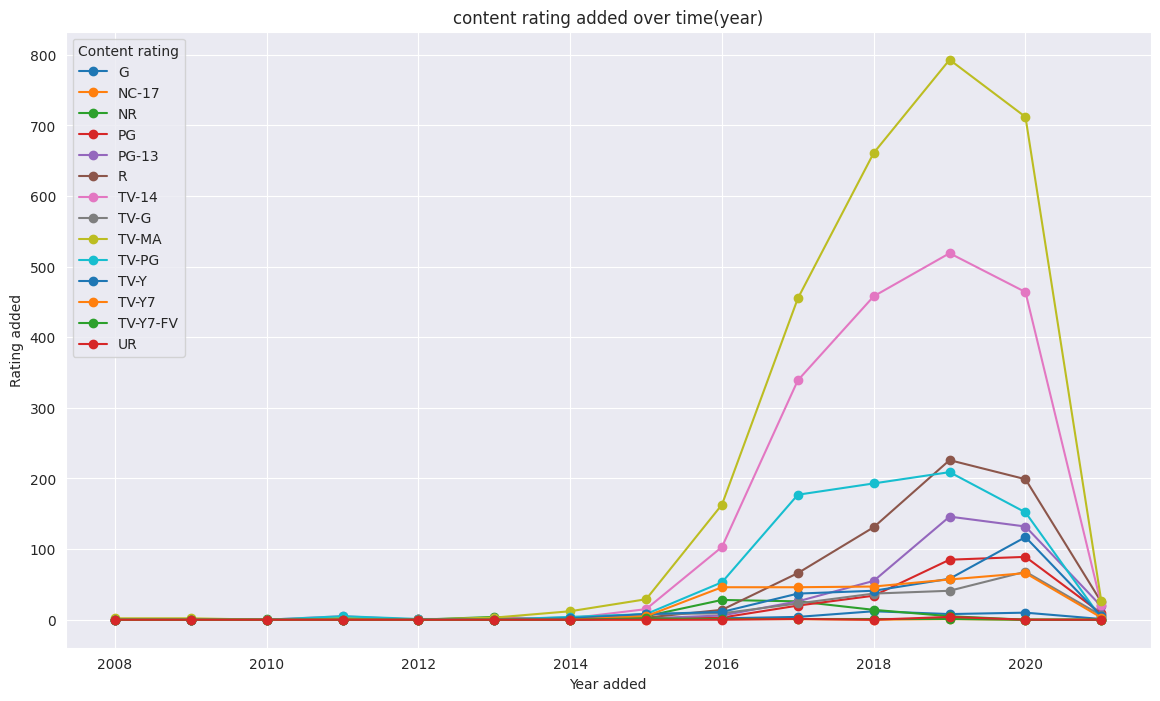

In [ ]:
rating_over_time=netflix_df.groupby(['year_added','rating']).size().unstack().fillna(0)
plt.figure(figsize=(14,8))
rating_over_time.plot(kind='line',marker='o',figsize=(14,8))
plt.title('content rating added over time(year)')
plt.xlabel('Year added')
plt.ylabel('Rating added')
plt.legend(title='Content rating')
plt.grid(True)
plt.show()

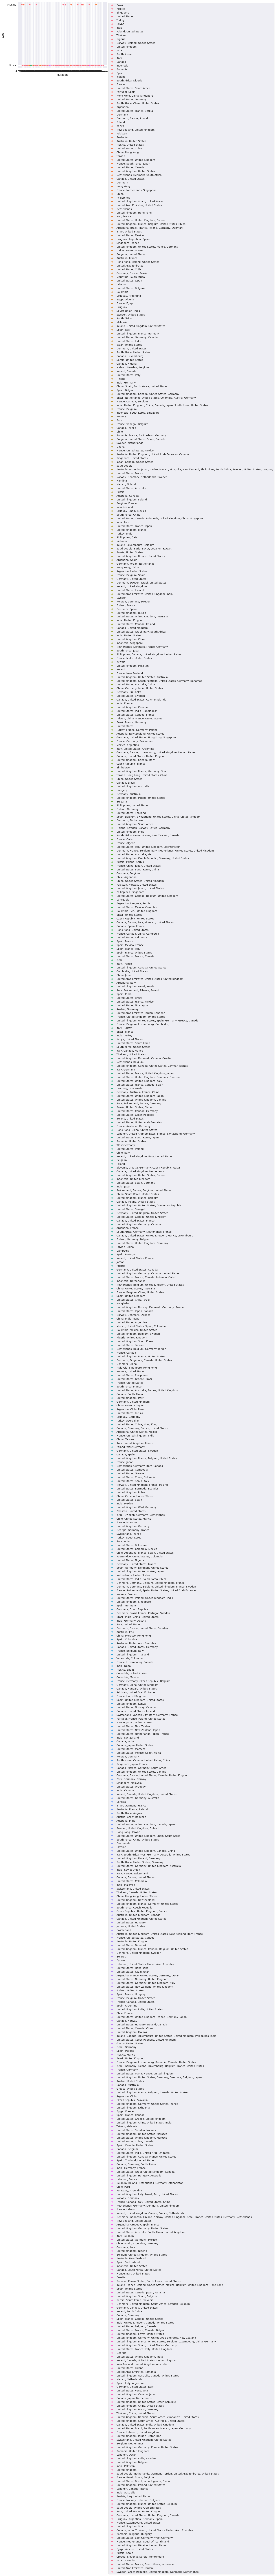

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot( x="duration", y='type', data=netflix_df,
                hue='country',)

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(netflix_df, hue='country', height=10)

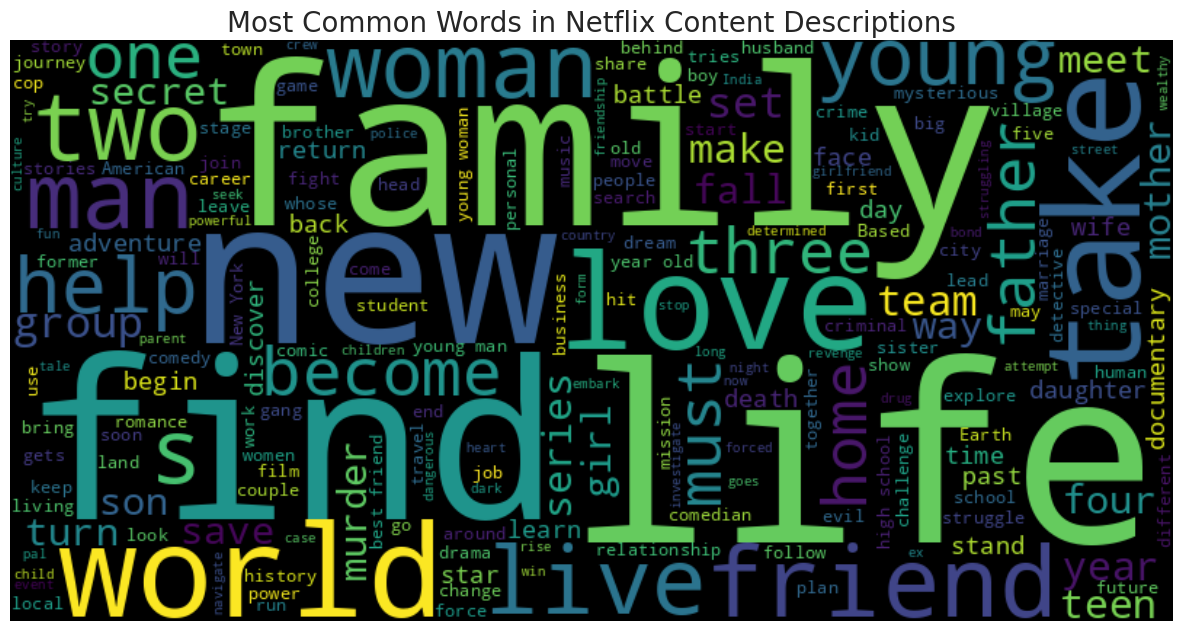

In [ ]:
text =''.join(netflix_df['description'])
wordcloud=WordCloud(width=800,height=400, background_color='black').generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

In [ ]:
director_counts = netflix_df['director'].value_counts()
top_5_directors = director_counts.head(5)
print("\nTop 5 directors on Netflix:")
print(top_5_directors)


Top 5 directors on Netflix:
director
Unknown                   2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Name: count, dtype: int64
